# Importing the Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

# Data Processing

In [2]:
df=pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

# EDA

In [4]:
#Countries And Credit Score

In [5]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

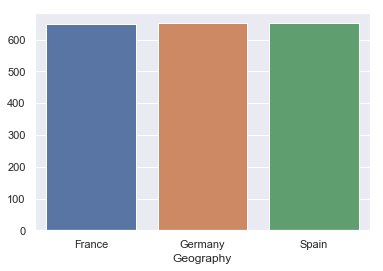

In [6]:
#Average Credit Score of each country
x=df.groupby('Geography')['CreditScore'].mean()
sns.barplot(x.index,x.values)

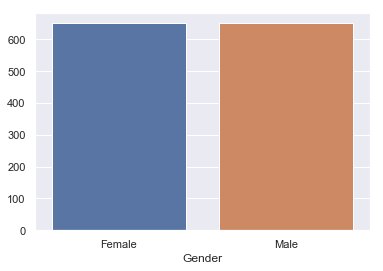

In [7]:
#Average Credit Score And Gender
x=df.groupby('Gender')['CreditScore'].mean()
sns.barplot(x.index,x.values)

In [8]:
#Credit Score by Gender of each country
x=df.groupby(['Geography','Gender'])['CreditScore'].mean()
x

Geography  Gender
France     Female    649.185759
           Male      650.064657
Germany    Female    653.093881
           Male      649.966565
Spain      Female    651.769513
           Male      650.992075
Name: CreditScore, dtype: float64

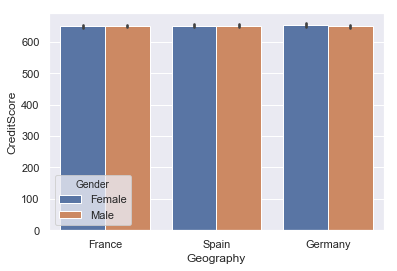

In [9]:
sns.barplot(x='Geography',y='CreditScore',data=df,hue='Gender')

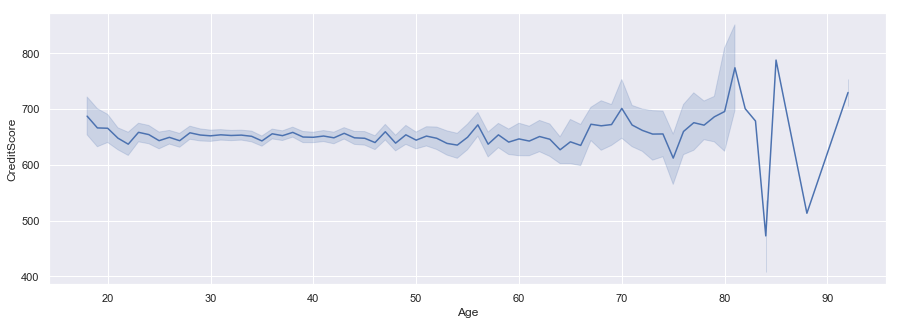

In [10]:
#Credit Score by Age
plt.figure(figsize=(15,5))
sns.lineplot(x='Age',y='CreditScore',data=df)

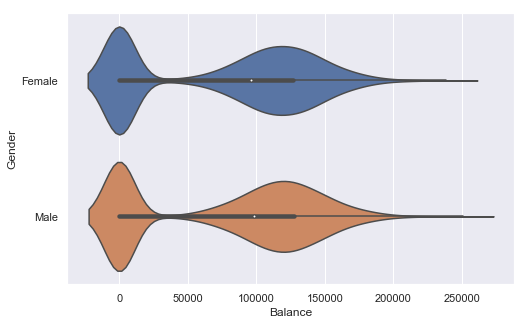

In [11]:
#Distribution of balance among different gender
plt.figure(figsize=(8,5))
sns.violinplot(x=df['Balance'],y=df['Gender'])

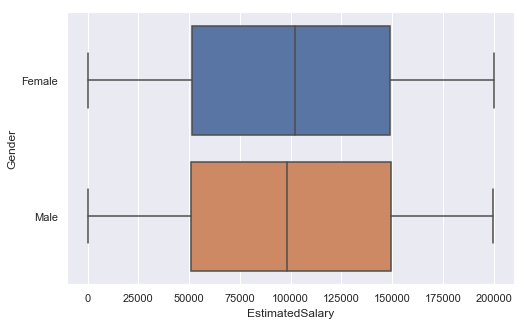

In [12]:
#Distribution of Estimated Salary of Both gender
plt.figure(figsize=(8,5))
sns.boxplot(x=df['EstimatedSalary'],y=df['Gender'])

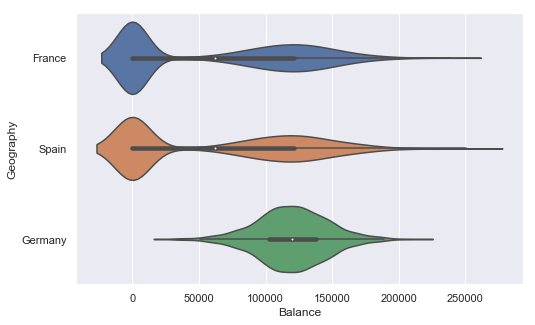

In [14]:
#Distribution of balance among different Countries
plt.figure(figsize=(8,5))
sns.violinplot(x=df['Balance'],y=df['Geography'])

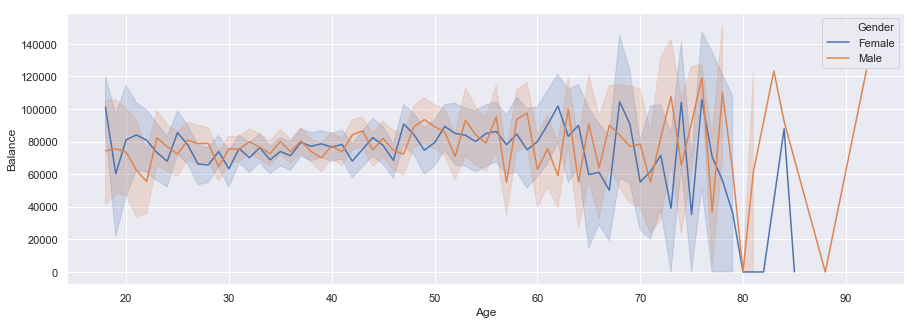

In [15]:
#Balance change by Age
plt.figure(figsize=(15,5))
sns.lineplot(x='Age',y='Balance',data=df,hue='Gender')

In [16]:
#Average credit score of customers with card
df[df['HasCrCard']==1]['CreditScore'].mean()

650.187951807229

In [17]:
#Average credit score of customers without card
df[df['HasCrCard']==0]['CreditScore'].mean()

651.3453310696095

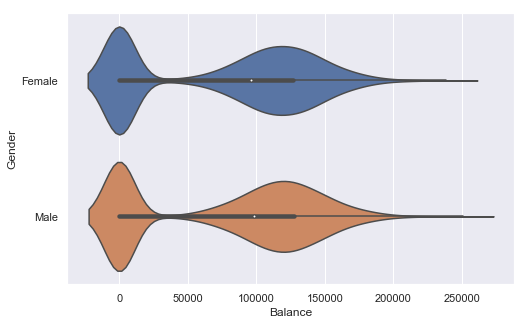

In [18]:
#Distribution of balance among different gender
plt.figure(figsize=(8,5))
sns.violinplot(x=df['Balance'],y=df['Gender'])

In [19]:
df.iloc[df['Balance'].idxmax()]

RowNumber              2093
CustomerId         15757408
Surname                  Lo
CreditScore             655
Geography             Spain
Gender                 Male
Age                      38
Tenure                    3
Balance              250898
NumOfProducts             3
HasCrCard                 0
IsActiveMember            1
EstimatedSalary       81054
Exited                    1
Name: 2092, dtype: object

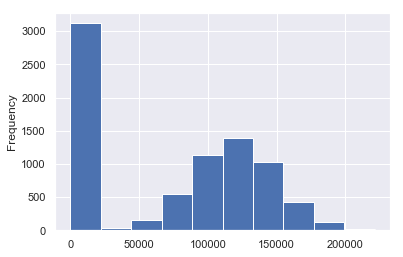

In [21]:
#Distribution Of Balance of exited customer
df[df['Exited']==0]['Balance'].plot(kind='hist')

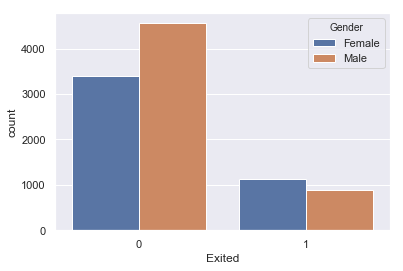

In [22]:
#Customer exited based on Gender
sns.countplot(df['Exited'],hue=df['Gender'])

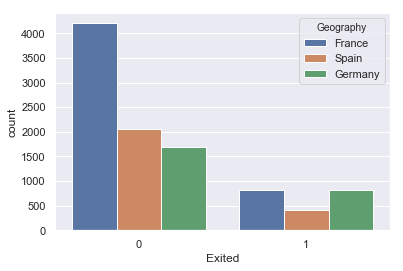

In [23]:
#Customer exited based on country
sns.countplot(df['Exited'],hue=df['Geography'])

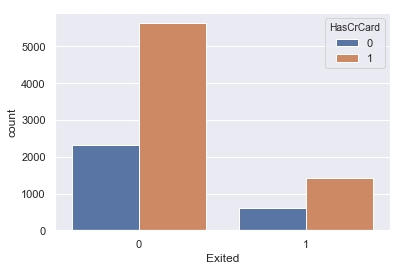

In [24]:
#Customer exited based on card
sns.countplot(df['Exited'],hue=df['HasCrCard'])

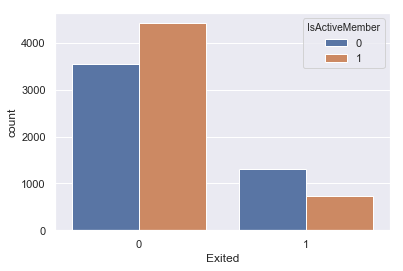

In [25]:
#Customer exited based on active member
sns.countplot(df['Exited'],hue=df['IsActiveMember'])

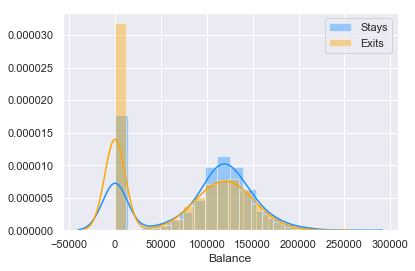

In [26]:
stays = df[df['Exited']==1]['Balance']
exits = df[df['Exited']==0]['Balance']

sns.distplot(stays, color="dodgerblue", label="Stays")
sns.distplot(exits, color="orange", label="Exits")
plt.legend();

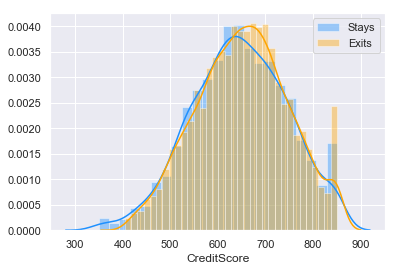

In [27]:
stays = df[df['Exited']==1]['CreditScore']
exits = df[df['Exited']==0]['CreditScore']

sns.distplot(stays, color="dodgerblue", label="Stays")
sns.distplot(exits, color="orange", label="Exits")
plt.legend();

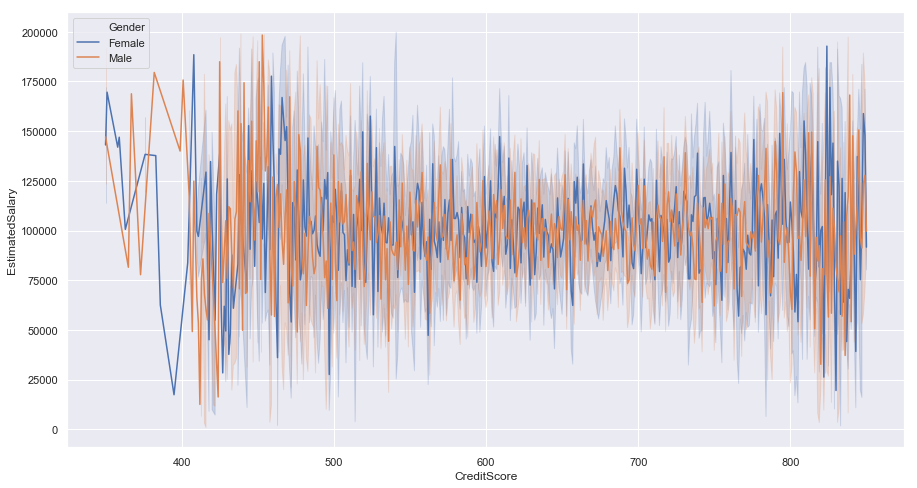

In [28]:
#Change in credit score with salary among different genders
plt.figure(figsize=(15,8))
sns.lineplot(df['CreditScore'],df['EstimatedSalary'],hue=df['Gender'])

Rejection: 0 points
z_score of 3 corresponds to prob of 0.27%


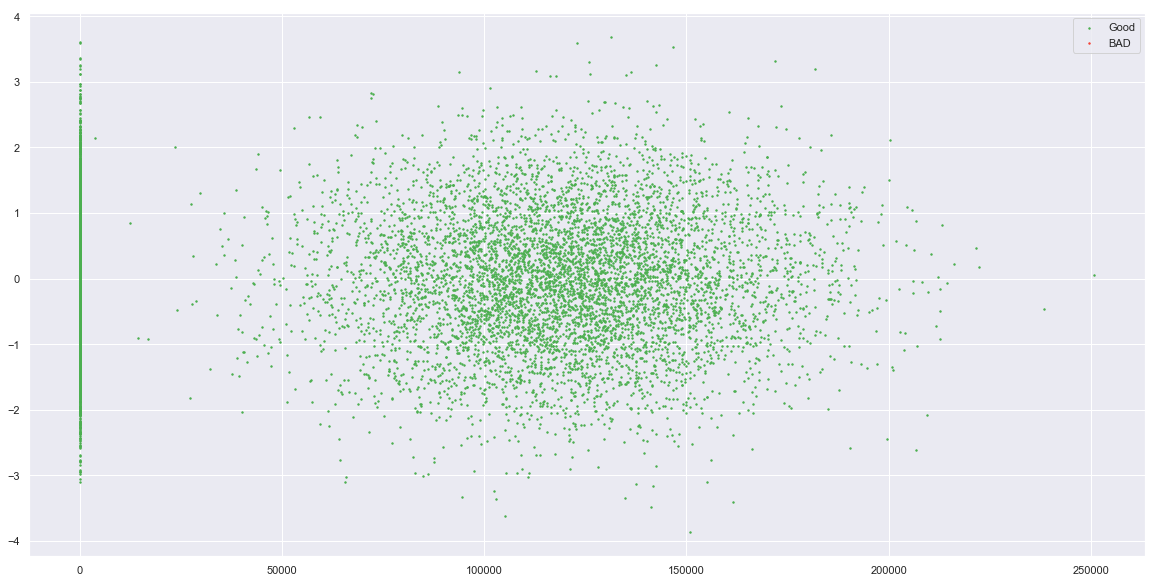

In [29]:
#Outliers Detection
mean,std=np.mean(df['Balance']),np.std(df['Balance'])
z_score=np.abs((df['Balance']-mean)/std)
threshold=3
good=z_score<threshold
print(f'Rejection: {(~good).sum()} points')

from scipy.stats import norm
print(f"z_score of 3 corresponds to prob of {100*2*norm.sf(threshold):0.2f}%")
visual_scatter=np.random.normal(size=df['Balance'].size)

plt.figure(figsize=(20,10))
plt.scatter(df['Balance'][good],visual_scatter[good],s=2,label='Good',color='#4CAF50')
plt.scatter(df['Balance'][~good],visual_scatter[~good],s=2,label='BAD',color='#F44336')
plt.legend()

Rejection: 8 points
z_score of 3 corresponds to prob of 0.27%


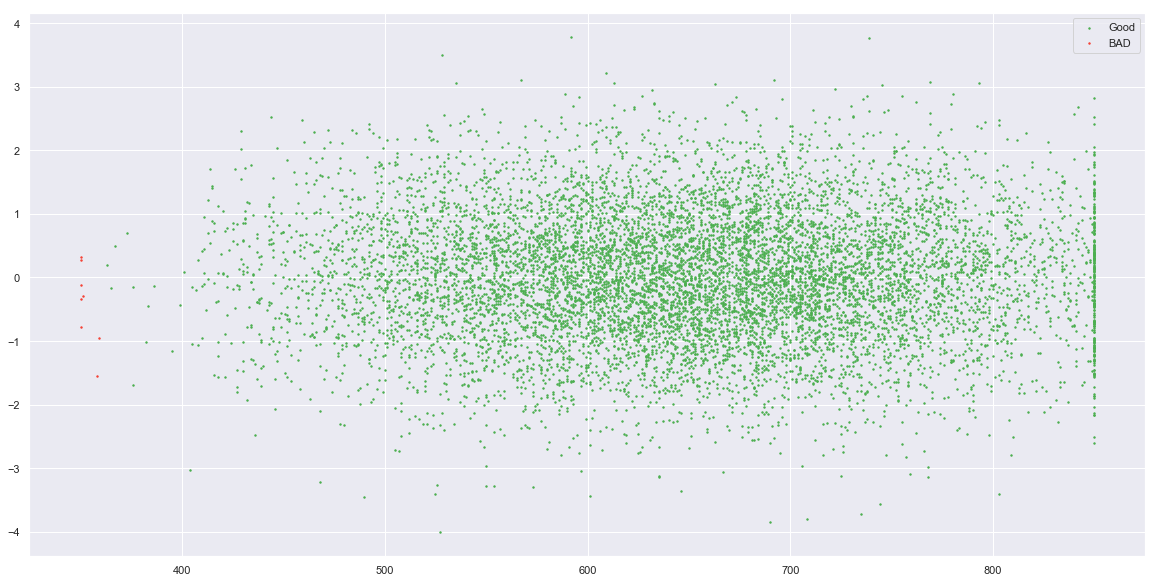

In [30]:
#Outliers Detection
mean,std=np.mean(df['CreditScore']),np.std(df['CreditScore'])
z_score=np.abs((df['CreditScore']-mean)/std)
threshold=3
good=z_score<threshold
print(f'Rejection: {(~good).sum()} points')

from scipy.stats import norm
print(f"z_score of 3 corresponds to prob of {100*2*norm.sf(threshold):0.2f}%")
visual_scatter=np.random.normal(size=df['Balance'].size)

plt.figure(figsize=(20,10))
plt.scatter(df['CreditScore'][good],visual_scatter[good],s=2,label='Good',color='#4CAF50')
plt.scatter(df['CreditScore'][~good],visual_scatter[~good],s=2,label='BAD',color='#F44336')
plt.legend()

In [31]:
df[df['CreditScore']<400]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
942,943,15804586,Lin,376,France,Female,46,6,0.00,1,1,0,157333.69,1
1193,1194,15779947,Thomas,363,Spain,Female,28,6,146098.43,3,1,0,100615.14,1
1201,1202,15651052,McMasters,399,Germany,Male,46,2,127655.22,1,1,0,139994.68,1
1405,1406,15612494,Panicucci,359,France,Female,44,6,128747.69,1,1,0,146955.71,1
1631,1632,15685372,Azubuike,350,Spain,Male,54,1,152677.48,1,1,1,191973.49,1
1838,1839,15758813,Campbell,350,Germany,Male,39,0,109733.20,2,0,0,123602.11,1
1962,1963,15692416,Aikenhead,358,Spain,Female,52,8,143542.36,3,1,0,141959.11,1
2473,2474,15679249,Chou,351,Germany,Female,57,4,163146.46,1,1,0,169621.69,1
2579,2580,15597896,Ozoemena,365,Germany,Male,30,0,127760.07,1,1,0,81537.85,1


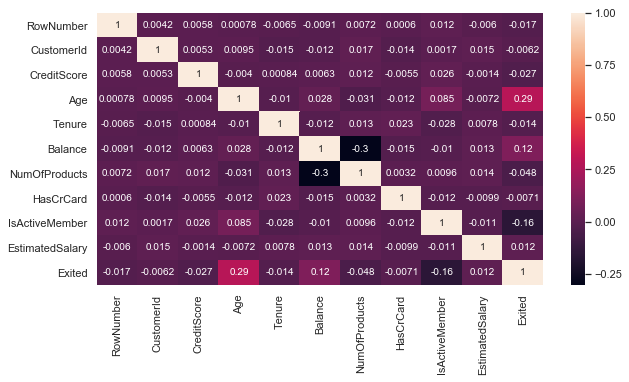

In [32]:
#Correlation Plot
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True)

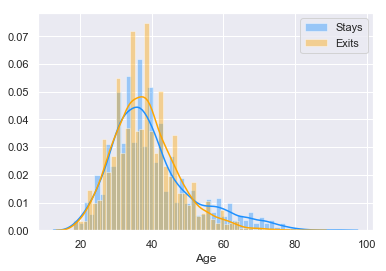

In [33]:
stays = df[df['IsActiveMember']==1]['Age']
exits = df[df['IsActiveMember']==0]['Age']

sns.distplot(stays, color="dodgerblue", label="Stays")
sns.distplot(exits, color="orange", label="Exits")
plt.legend();

In [35]:
df_copy=df

In [36]:
#Change categorical variable to numerical
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Geography']=le.fit_transform(df['Geography'])
df['Gender']=le.fit_transform(df['Gender'])

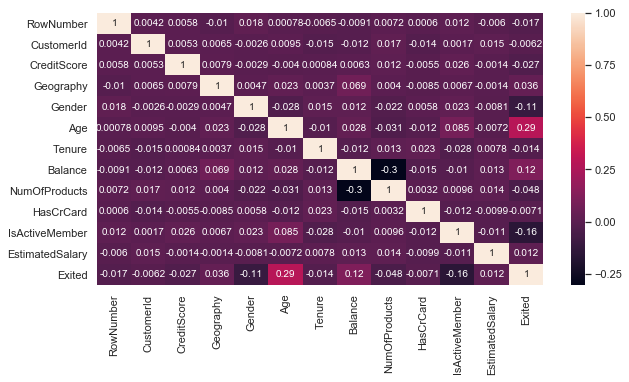

In [37]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True)

In [144]:
X=df.drop(['RowNumber','CustomerId','Surname','Exited'],axis=1)
Y=df['Exited']

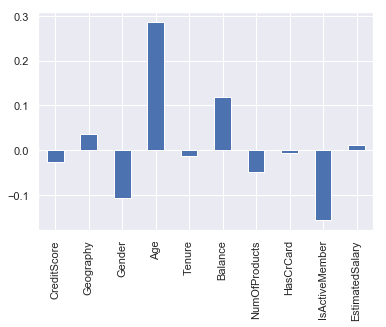

In [145]:
X.corrwith(Y).plot(kind='bar')

In [146]:
X=X.drop(['CreditScore','Geography','Tenure','HasCrCard','EstimatedSalary'],axis=1)

In [147]:
Y.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [148]:
#Normalizing the data
from sklearn.preprocessing import StandardScaler
mm_scaler = StandardScaler()
X= mm_scaler.fit_transform(X)

In [149]:
#Spliting the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y)

In [82]:
#Applying Oversampling
#Handling the Imbalanced data - SMOTE (Synthetic Minority Over-sampling Technique)
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=12)
X_res,y_res=sm.fit_sample(x_train,y_train)

In [83]:
unique,count=np.unique(y_res,return_counts=True)
y_smote_value_count={k:v for (k,v) in zip(unique,count)}
y_smote_value_count

{0: 5971, 1: 5971}

# Data Modelling

In [150]:
N,D=x_train.shape

In [151]:
import tensorflow as tf

In [152]:
#Model with one input layer, 2 hidden layer and 1 output layer
model=tf.keras.models.Sequential([
                                  tf.keras.layers.Input(shape=(D,)),
                                  tf.keras.layers.Dense(units=6, activation='relu'),
                                  tf.keras.layers.Dense(units=6, activation='relu'),
                                  tf.keras.layers.Dense(1,activation='sigmoid')
                                  
])

In [153]:
#optimizer=tf.keras.optimizers.SGD(0.001,0.9),loss='mse'
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [154]:
r=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100)

Epoch 1/100
235/235 [==============================] - 0s 2ms/step - loss: 0.6565 - accuracy: 0.6379 - val_loss: 0.5306 - val_accuracy: 0.8096
Epoch 2/100
235/235 [==============================] - 0s 2ms/step - loss: 0.4833 - accuracy: 0.7919 - val_loss: 0.4354 - val_accuracy: 0.8096
Epoch 3/100
235/235 [==============================] - 0s 2ms/step - loss: 0.4476 - accuracy: 0.7940 - val_loss: 0.4169 - val_accuracy: 0.8148
Epoch 4/100
235/235 [==============================] - 0s 2ms/step - loss: 0.4318 - accuracy: 0.8031 - val_loss: 0.4057 - val_accuracy: 0.8256
Epoch 5/100
235/235 [==============================] - 0s 2ms/step - loss: 0.4139 - accuracy: 0.8233 - val_loss: 0.3887 - val_accuracy: 0.8472
Epoch 6/100
235/235 [==============================] - 0s 2ms/step - loss: 0.3928 - accuracy: 0.8441 - val_loss: 0.3717 - val_accuracy: 0.8540
Epoch 7/100
235/235 [==============================] - 0s 2ms/step - loss: 0.3782 - accuracy: 0.8512 - val_loss: 0.3621 - val_accuracy: 0.8596

Epoch 58/100
235/235 [==============================] - 0s 1ms/step - loss: 0.3493 - accuracy: 0.8557 - val_loss: 0.3380 - val_accuracy: 0.8588
Epoch 59/100
235/235 [==============================] - 0s 1ms/step - loss: 0.3491 - accuracy: 0.8560 - val_loss: 0.3389 - val_accuracy: 0.8592
Epoch 60/100
235/235 [==============================] - 0s 1ms/step - loss: 0.3490 - accuracy: 0.8553 - val_loss: 0.3384 - val_accuracy: 0.8596
Epoch 61/100
235/235 [==============================] - 0s 1ms/step - loss: 0.3491 - accuracy: 0.8563 - val_loss: 0.3384 - val_accuracy: 0.8596
Epoch 62/100
235/235 [==============================] - 0s 2ms/step - loss: 0.3485 - accuracy: 0.8564 - val_loss: 0.3376 - val_accuracy: 0.8568
Epoch 63/100
235/235 [==============================] - 0s 2ms/step - loss: 0.3490 - accuracy: 0.8569 - val_loss: 0.3383 - val_accuracy: 0.8588
Epoch 64/100
235/235 [==============================] - 0s 1ms/step - loss: 0.3488 - accuracy: 0.8564 - val_loss: 0.3382 - val_accuracy:

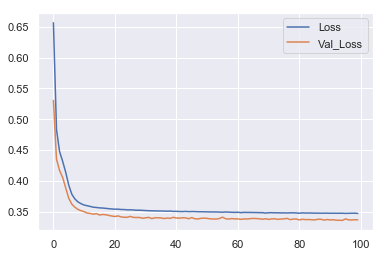

In [155]:
plt.plot(r.history['loss'],label='Loss')
plt.plot(r.history['val_loss'],label='Val_Loss')
plt.legend()

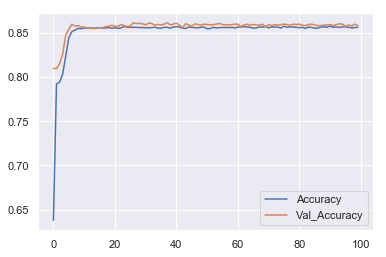

In [156]:
plt.plot(r.history['accuracy'],label='Accuracy')
plt.plot(r.history['val_accuracy'],label='Val_Accuracy')
plt.legend()

In [157]:
y_pred=model.predict(x_test)

In [158]:
for i in range(0, y_pred.size):
    if y_pred[i] > 0.5:
        y_pred[i] = 1
    else:
        y_pred[i] = 0

# Evaluation

In [159]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

         0.0       0.97      0.87      0.92      2239
         1.0       0.40      0.73      0.52       261

    accuracy                           0.86      2500
   macro avg       0.68      0.80      0.72      2500
weighted avg       0.91      0.86      0.88      2500



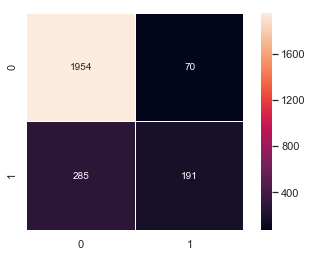

In [162]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True, fmt = '.0f', linewidths = .5, square = True)